### Homework - 1

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline


In [30]:
# Importing Dataset
path = "Utilities.csv"
df=pd.read_csv(path)

### 1. Compute the minimum, maximum, mean, median, and standard deviation for each of the numeric variables. Which variable(s) has the largest variability? Explain your answer

In [2]:
df.describe().transpose()[['min','max','mean','50%','std' ]].transpose()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
min,0.750000,6.400000,96.000000,49.800000,-2.200000,3300.000000,0.00000,0.309000
max,1.490000,15.400000,252.000000,67.600000,9.200000,17441.000000,50.20000,2.116000
mean,1.114091,10.736364,168.181818,56.977273,3.240909,8914.045455,12.00000,1.102727
50%,1.110000,11.050000,170.500000,56.350000,3.000000,8024.000000,0.00000,0.960000
std,0.184511,2.244049,41.191349,4.461148,3.118250,3549.984031,16.79192,0.556098


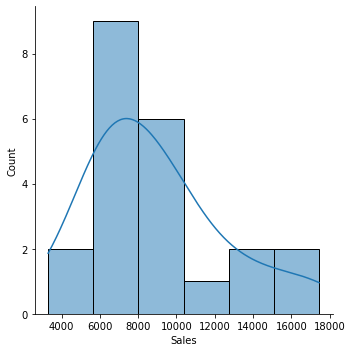

In [3]:
# Distribution Graph for Sales Variable

sns.displot(df, x="Sales", kde=True)

The above data frame describes the statistics of the given dataset. It can be seen that Sales variable has the highest variability followed by Cost and Nuclear. Their standard deviations are, 3549.98, 41.19 and 16.79 respectively. The range among these three as seen above is also high.

### 2. Create boxplots for each of the numeric variables. Are there any extreme values for any of the variables? Which ones? Explain your answer

Text(0.5, 1.0, 'Load_factor Boxplot')

<Figure size 720x432 with 0 Axes>

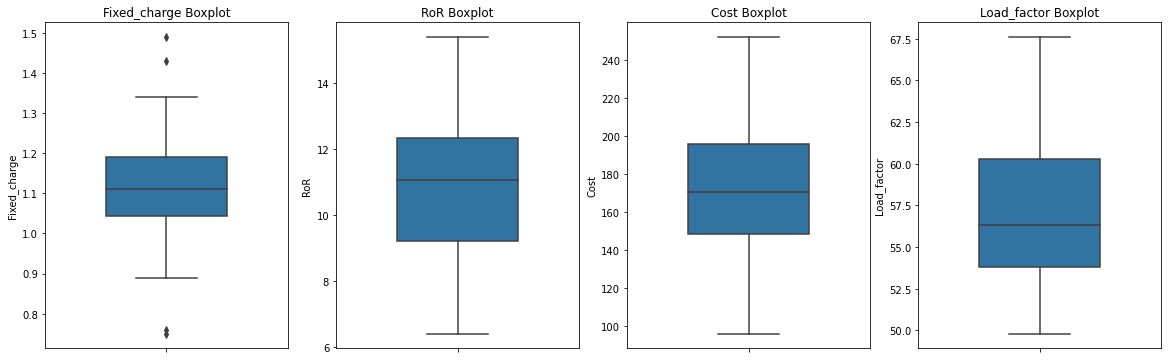

In [4]:
plt.figure(figsize=(10,6))
f, axes = plt.subplots(1, 4,figsize=(20,6))

sns.boxplot(y='Fixed_charge', data=df,  orient='v' , ax=axes[0],width=.5)
sns.boxplot(  y="RoR",  data=df,  orient='v' , ax=axes[1],width=.5)
sns.boxplot(  y="Cost",  data=df,  orient='v' , ax=axes[2],width=.5)
sns.boxplot(  y="Load_factor", data=df,  orient='v' , ax=axes[3], width=.5)


axes[0].set_title('Fixed_charge Boxplot')
axes[1].set_title('RoR Boxplot')
axes[2].set_title('Cost Boxplot')
axes[3].set_title('Load_factor Boxplot')

Text(0.5, 1.0, 'Fuel_Cost Boxplot')

<Figure size 720x432 with 0 Axes>

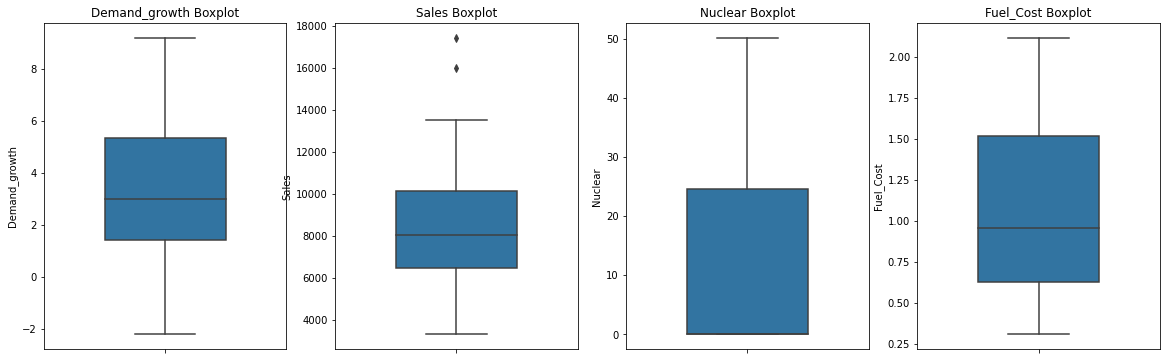

In [5]:
plt.figure(figsize=(10,6))
f, axes1 = plt.subplots(1, 4,figsize=(20,6))
sns.boxplot(  y="Demand_growth",  data=df,  orient='v' , ax=axes1[0], width=.5)
sns.boxplot(  y="Sales",  data=df,  orient='v' , ax=axes1[1], width=.5)
sns.boxplot(  y="Nuclear",  data=df,  orient='v' , ax=axes1[2], width=.5)
sns.boxplot(  y="Fuel_Cost",  data=df,  orient='v' , ax=axes1[3], width=.5)

axes1[0].set_title('Demand_growth Boxplot')
axes1[1].set_title('Sales Boxplot')
axes1[2].set_title('Nuclear Boxplot')
axes1[3].set_title('Fuel_Cost Boxplot')

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distribution. In this extreme value is defined as being any point of data that lies over 1.5 Interquartile Ranges(IQRs) below the first quartile (Q1) or above the third quartile (Q3)in a dataset.
From the boxplots above, it can be deduced that, there exists extreme values for Fixed Charge and Sales variables.

### 3. Create a heatmap for the numeric variables. Discuss any interesting trend you see in this chart

In [6]:
df_corr = df[['RoR', 'Cost', 'Load_factor','Demand_growth', 'Sales', 'Nuclear', 'Fuel_Cost']].corr()

<AxesSubplot:title={'center':'Heat Map for Correlation between numerical variables'}>

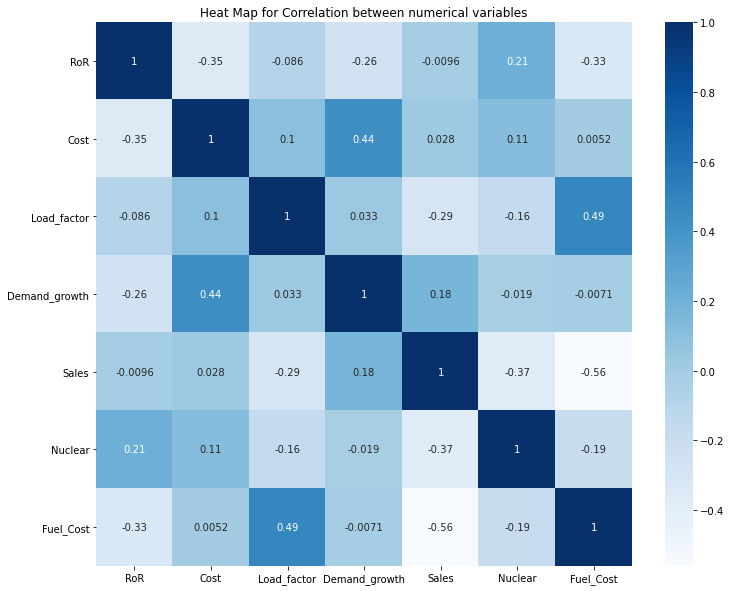

In [7]:
plt.figure(figsize=(12, 10))
plt.title("Heat Map for Correlation between numerical variables")
sns.heatmap(df_corr, annot=True, cmap = 'Blues')

Heatmap defines a graphical representation of data using colours to visualize the values of the matrix.
From the generated Heat Map, it is observed that there is no high correlation between any two variables of the given data. 

Few trends observed are as below:

1. Increase in Fuel_Cost will reduce the Sales.

2. Demand_growth is directly proportional to Cost.


### 4. Run principal component analysis using unscaled numeric variables in the dataset. How do you interpret the results from this model? 

In [8]:
from sklearn.decomposition import PCA

In [9]:
# Considering the Data Frame with Numeric Columns
df_numeric=df[['Fixed_charge','RoR', 'Cost', 'Load_factor','Demand_growth', 'Sales', 'Nuclear', 'Fuel_Cost']]

In [10]:
# Creating a PCA instance
pca_unscaled = PCA(random_state=123)

In [11]:
# Fitting the PCA instance with the Numeric Data
pca_unscaled.fit_transform(df_numeric)

array([[ 1.62970630e+02, -1.79353052e+01, -1.04572018e+01,
         3.45164170e+00, -6.54123147e-01, -1.46872249e+00,
         6.05027764e-01,  5.41851733e-02],
       [-3.82605202e+03,  3.53468643e+01,  4.52867453e+00,
         4.99144559e-01, -1.52416994e+00, -3.20465032e-01,
        -1.83225799e-01, -2.73741800e-01],
       [ 2.97958767e+02, -5.59421815e+01, -7.69274676e+00,
         3.80099450e+00,  1.25021270e+00,  4.40941092e+00,
        -2.30122351e-01,  1.66194069e-02],
       [-2.49108077e+03,  1.56709874e+00,  1.79505003e+01,
         3.20756246e-01, -2.42465371e+00, -7.50899921e-01,
         3.36218996e-01, -8.81526806e-02],
       [-5.61403289e+03,  2.51097679e+01, -7.05996451e+00,
         8.93521908e+00, -1.49844508e+00, -1.30312403e+00,
        -5.61027235e-01,  2.83879542e-01],
       [ 2.21291169e+03, -5.71046945e+01,  1.73498478e+01,
        -5.97553893e+00, -4.25704055e+00, -6.88402991e-02,
        -5.50734312e-01,  9.54513477e-02],
       [-1.27202393e+03,  6.432112

In [12]:
# Explained Variance of all the components
pca_unscaled.explained_variance_

array([1.26024294e+07, 1.70314141e+03, 2.40006760e+02, 1.60079553e+01,
       7.74357721e+00, 3.90691089e+00, 1.22582078e-01, 1.49908933e-02])

In [13]:
# Explained Variance Ratio of all the components
pca_unscaled.explained_variance_ratio_

array([9.99843630e-01, 1.35122764e-04, 1.90415057e-05, 1.27002911e-06,
       6.14355068e-07, 3.09964043e-07, 9.72533993e-09, 1.18933808e-09])

In [14]:
# Cumulative Explained Variance Ratio of all the components
pca_unscaled.explained_variance_ratio_.cumsum()

array([0.99984363, 0.99997875, 0.99999779, 0.99999906, 0.99999968,
       0.99999999, 1.        , 1.        ])

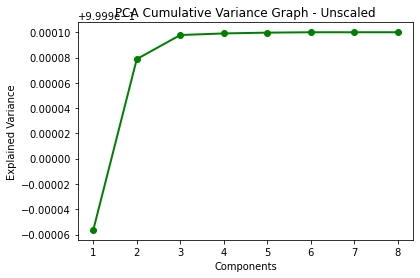

In [15]:
comp_count = np.arange(pca_unscaled.n_components_) + 1
plt.plot(comp_count, pca_unscaled.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='green')
plt.title('PCA Cumulative Variance Graph - Unscaled')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

Text(0.5, 0, 'Principal Component 1')

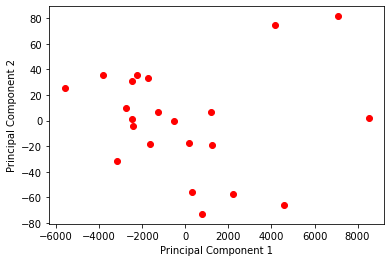

In [16]:
pca_unscaled_main = PCA(n_components=2, random_state=123)

#Plotting the PCA components without scaling the numeric variables
pca_components = pca_unscaled_main.fit_transform(df_numeric)
pca_componentsDF=pd.DataFrame(data=pca_components, columns=['principal component 1', 'principal component 2'])
plt.scatter('principal component 1', 'principal component 2', data=pca_componentsDF, color='r')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')

In [17]:
print(pca_unscaled_main.explained_variance_ratio_)

[9.99843630e-01 1.35122764e-04]


PCA is a great technique for visualization and a tool for reducing data dimensionality while preseving the information as much information as possible. In implementing the PCA above, we selected two Principal Components.
From the visualization above, there exists there exists two 'clusters' where over 99% of the data points lies in one cluster.
As show above, PC1  accounts for 99.98% of the information in the dataset, hence a single component could be used.

### 5. Next, run principal component model after scaling the numeric variables.

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Creating a MinMax Scaler instance
scaler = MinMaxScaler()

In [20]:
# Scaling the Numeric Data
data_scaled = scaler.fit_transform(df_numeric)

In [21]:
# Creating a PCA instance
pca_scaled = PCA(random_state=123)

In [22]:
# Fitting the instance with Scaled Data
pca_scaled.fit_transform(data_scaled)

array([[-7.84533084e-02,  2.27673248e-01, -2.09358938e-01,
        -2.16632333e-01,  1.07613332e-01,  5.93883378e-02,
        -1.97107444e-01, -1.09005190e-01],
       [ 2.26870009e-01, -2.59091795e-01,  3.65289555e-01,
        -1.92290539e-01,  3.59000122e-02,  1.14001293e-01,
        -3.16056011e-02,  2.31994952e-01],
       [-3.97205792e-01, -1.52721777e-01, -5.16955881e-01,
         3.16407999e-01,  1.12740316e-02, -3.56177948e-01,
        -3.48144358e-02,  8.68811046e-02],
       [-3.43182747e-01, -2.26297655e-01,  2.83338908e-01,
        -2.72440993e-01, -2.95134313e-02,  1.85636059e-01,
        -8.23199859e-02,  2.87405722e-02],
       [ 1.81856735e-01, -5.42278797e-01,  3.84897689e-02,
         1.23055849e-01,  7.18325434e-01, -1.63008069e-01,
         4.99609598e-02, -1.30032094e-01],
       [-3.59141140e-01, -4.61902638e-01, -3.66519399e-01,
        -5.15520576e-02, -1.54164010e-01,  1.54677018e-01,
         3.28541791e-01, -4.28612154e-02],
       [ 3.98542610e-01, -3.224577

In [23]:
# Explained Variance of all the components
pca_scaled.explained_variance_

array([0.15962678, 0.13850169, 0.12242111, 0.06788535, 0.0434142 ,
       0.04136963, 0.01676391, 0.01133132])

In [24]:
# Explained Variance Ratio of all the components
pca_scaled.explained_variance_ratio_

array([0.26546327, 0.23033172, 0.20358933, 0.11289501, 0.07219888,
       0.06879872, 0.0278788 , 0.01884427])

In [25]:
# Cumulative Explained Variance Ratio of all the components
pca_scaled.explained_variance_ratio_.cumsum()

array([0.26546327, 0.495795  , 0.69938432, 0.81227933, 0.88447821,
       0.95327693, 0.98115573, 1.        ])

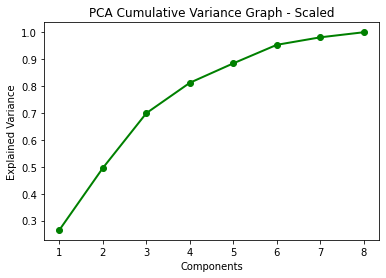

In [26]:
comp_count = np.arange(pca_scaled.n_components_) + 1
plt.plot(comp_count, pca_scaled.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='green')
plt.title('PCA Cumulative Variance Graph - Scaled')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

From the above Graph, it is understood that almost 90% of the Explained Variance can be obtained by the first five components. The Cumulative Sum of the Explained Variance for these components is 88.44. Hence, a new PCA instance is created with n_components = 5 and fit with scaled data.

Text(0.5, 0, 'Principal Component 1')

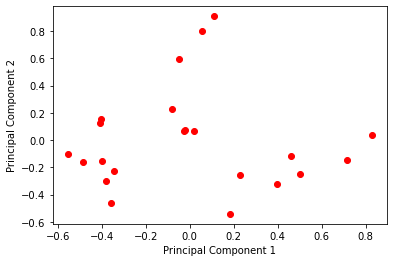

In [27]:
pca_scaled_main = PCA(n_components=5, random_state=123)

#Plotting the PCA components without scaling the numeric variables
pca_components_scaled = pca_scaled_main.fit_transform(data_scaled)
pca_components_scaled_DF=pd.DataFrame(data=pca_components_scaled, columns=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
plt.scatter('principal component 1', 'principal component 2', data=pca_components_scaled_DF, color='r')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')

In [28]:
print(pca_scaled_main.explained_variance_ratio_)

[0.26546327 0.23033172 0.20358933 0.11289501 0.07219888]


### Did the results/interpretations change?  How so?  Explain your answers.

The results/Interpretations changed.

With the unscaled data, 99% of the Explained Variance is obtained by one component itself.

But, 90% of the Explained Variance for the Scaled data is achieved by five components.

For this dataset, the dimensionality reduction using PCA performed better without scaling the data.